# Exercise 1 

(20 points) True or False.
(a) In class imbalanced classification tasks, the goal is to find the model that has the highest accuracy. (True False) TRUE
(b) Over-fitting is the biggest issue with over-sampling. (True False) TRUE
(c) Under-fitting is the biggest issue with over-sampling. (True False) FALSE
(d) A model with a large number of input variables always have a good performance. (True False) FALSE
(e) If we run the SMOTE sampling technique multiple times on an imbalanced dataset, we will always obtain the same synthetic dataset. (True False) FALSE
(f) Replacing missing values with mean values will always boost model performance. (True False) FALSE
(g) RFE works with any support vector machine model. (True False) FALSE
(h) RFE doesn’t work with any support vector machine model. (True False) TRUE
(i) A typical approach to engineer features is to consider interactions because most interactions help models to generate good predictions. (True False) TRUE 
(j) The support vectors in support vector machine models can be used to identify important variables/features. (True False) TRUE 

2. (5 points) How does the Recursive Feature Elimination (RFE) algorithm work? Be specific.
        RFE works by creating ranking all of the predictors based on importance, then an intial model is made using all of the predictors, then more models are created one after another, each time eliminating the least important predictors. This is done until there is only a few predictors left, making these the most important predictors. 

3. (5 points) Explain k-NN imputation. Be specific.
        k-NN is the process of replacing missing values in the data set by using the Euclidean distance of all of the nearest neighbors and taking the mean of these values to replace the null values. 

4. (5 points) In what scenarios, would it be prefer to use the median imputation instead of mean imputation? Be specific.
        We want to use the mean imputation when the variables are normally distributed, but if the variables are not normally distrbiuted we will take the median imputatuion. 

5. (5 points) If you have a date column in your data-frame, then how will you perform feature engineering on the date column? List at least three features that you will engineer from date. Be specific.
        Month, day, hour(sometmes), year, quarter of the year.

6. (5 points) In what scenarios, would you prefer to use the precision-recall curve instead of ROC curve to measure the performance of a classifier? Be specific.
        We would want to use the precision-recall curve when the data is imbalanced, this is because we want a higher accuracy, and less false positives.

7. (7 points) Explain the biggest drawback of one-vs-one multi-class classification when compared to one-vs-all multi-class classification. Be specific.
        When looking at a one-vs-one classification we are building a classifier for each pair of classes, creating a large number of models. Then the one-vs-many classification is one classifer against one class, and this is done for each classifier and all of the classes are fitted against one another. This however still creates less models and thus makes this less complicated than the one-vs-one multi-class classfication. Leaving out data, in onevone

8. (4 points) A data scientist is building a linear regression model. One of the input variables is a categorical variable with three labels. So, he decided to use the one-hot encoding approach to transform the categorical variable into dummy variables. How many dummy variables does he need to include in the linear model?
(a) 0
(b) 1
(c) 2
(d) 3
(e) None of the above
The answer is D

9. (7 points) Suppose you are building a fraud detection system for major US bank. You have access to all the transaction data for the past week for users (date, location, and amount). What kind of new features can you engineer? Be creative and list at least three features that you would engineer for the fraud detection system.
amount per location, average amount each day, what locations have transactions more often(the amount per location, compared day to day)

# Exercise 16

(a) (4 points) Using the pandas library, read the Customers.csv data file and create two
data-frames, called it customers.

In [204]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE, RFECV 
from sklearn.svm import SVR, SVC

#defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'rachaeld-data445'
bucket = s3.Bucket(bucket_name)

#defining the csv file
file_key = 'Customers.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

customers = pd.read_csv(file_content_stream)
customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [205]:
customers.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [207]:
#Replacing na values in profession
#Identifying categorical variables
categorical_vars = customers.select_dtypes(include = 'object').columns.to_list()
print(categorical_vars)

frequent_values = customers[categorical_vars].mode().iloc[0].to_dict()
print(frequent_values)

## Filling missing values with most frequent labels
customers = customers.fillna(value = frequent_values)

#Identifying numeric variables
numeric_vars = customers.select_dtypes(exclude = 'O').columns.to_list()
print(numeric_vars)

#Choosing median because the data isn't normal
#Compute the median values of the numerical variables and store in a dictionary
median_values = customers[numeric_vars].median().to_dict()
median_values

#Let’s replace missing data with the median
customers = customers.fillna(value = median_values)
customers.isna().sum()

['Gender', 'Profession']
{'Gender': 'Female', 'Profession': 'Artist'}
['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

(b) (3 points) Drop the Customer ID variable.


In [208]:
customers = customers.drop(['CustomerID'], axis = 1)
customers.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


(b) (10 points) Create at least three exploratory charts that may show interesting relationships in the data. Make sure to comment on those charts.


/tmp/ipykernel_4684/2718370601.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(customers.corr(), annot = True)


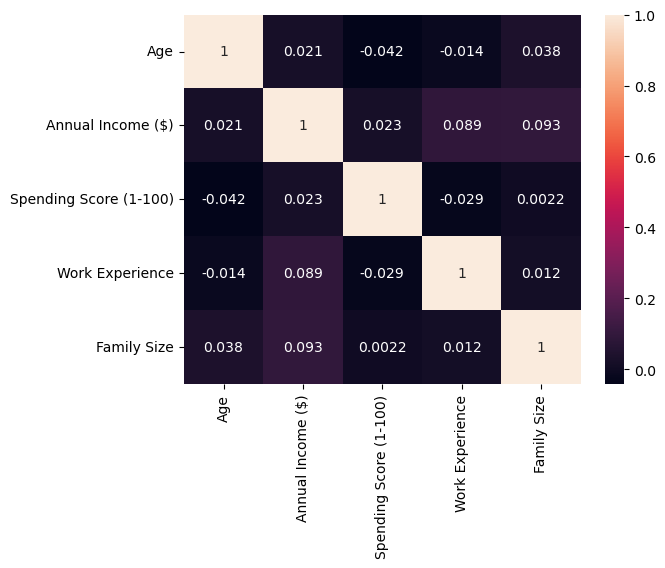

In [184]:
## heatmap 
sns.heatmap(customers.corr(), annot = True)
plt.show()

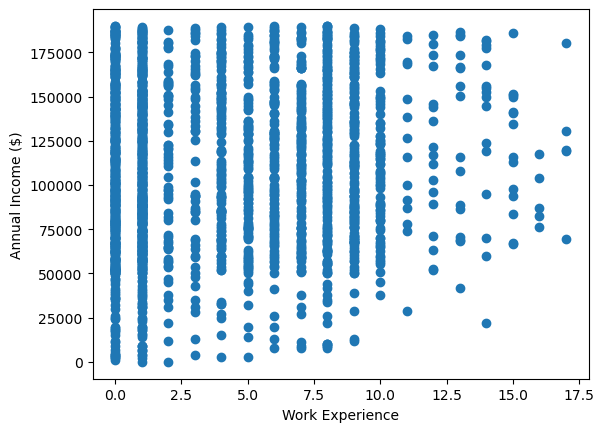

In [185]:
## work expereince and annual income 
plt.scatter(customers['Work Experience'], customers['Annual Income ($)'])
plt.xlabel('Work Experience')
plt.ylabel('Annual Income ($)')
plt.show()

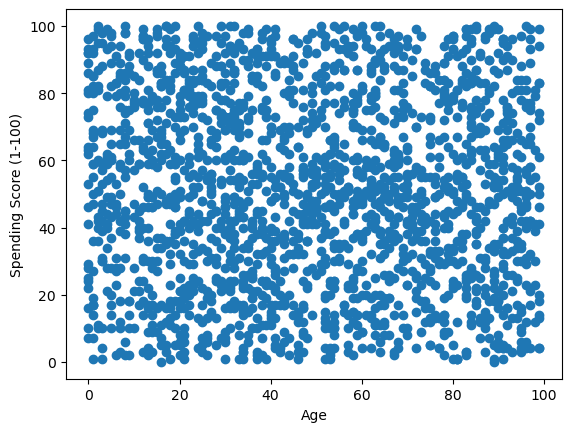

In [186]:
## age and spending score
plt.scatter(customers['Age'], customers['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

##from the below plot we can see that there is no correlation between Ages and the spending scores. There are no apparent patterns/trends in the data.

In [127]:
from pandas_profiling import ProfileReport

/tmp/ipykernel_4684/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [179]:
customers.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

(c) (5 points) Split the customers data-frame into: train (80%) and test (20%).

In [209]:
#defining the input and target variables
X = customers.drop(columns = ['Spending Score (1-100)'])
Y = customers['Spending Score (1-100)']

#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

(d) (25 points) Using the train data-frame, engineer at least five different features, that can help to predict Spending Score, using the given input variables. Engineer the same features, that you engineer on the train data-frame, on the test data-frame.

These are the rules to engineer the features:

    • You can’t use the Box-Cox transformation.
    • You can’t use neither 0-1 scaling nor z-score standardization.
    • You can engineer at most two features using strong heredity principle. For reference, see homework assignment 4.

In [210]:
## engineering variables, strong heredity
##defining the list to store feature importances
importance = list()

for i in range (0,25):
    ##defining input and target variables
    X2 = customers.drop(columns = ['Spending Score (1-100)', 'Gender', 'Profession'])
    Y2 = customers['Spending Score (1-100)']
    
    ##splitting the train data 
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = .2, stratify = Y2)
    
    ##buinding the RF model
    RF = RandomForestRegressor(n_estimators = 500, max_depth = 3).fit(X_train2, Y_train2)
    
    ##extracting the feature importances
    importance.append(RF.feature_importances_)
    
##transforming list into data-frame
importance = pd.DataFrame(importance)
importance.columns = X2.columns

## average of the importances 
importance = pd.DataFrame(importance.apply(np.mean, axis = 0))
importance

importance = pd.DataFrame({'Feature': importance.index, 'Importance': importance[0].values})
importance

##descending order
importance = importance.sort_values(by = 'Importance', ascending = False)
importance

,Feature,Importance
1,Annual Income ($),0.503786
0,Age,0.294600
2,Work Experience,0.123241
3,Family Size,0.078373


In [211]:
##engineering interactions based on feature importance
##Engineered varaible 1
X_train['interaction_1'] = X_train['Annual Income ($)'] * X_train['Age']
X_test['interaction_1'] = X_test['Annual Income ($)'] * X_test['Age']

##Engineered variable 2
X_train['interaction_2'] = X_train['Annual Income ($)'] * X_train['Work Experience']
X_test['interaction_2'] = X_test['Annual Income ($)'] * X_test['Work Experience']

In [212]:
## engineering variables, income/family size
##Engineered variable 3
X_train['Annual Income/Family Size'] = X_train['Annual Income ($)']/ X_train['Family Size']
X_test['Annual Income/Family Size'] = X_test['Annual Income ($)']/ X_test['Family Size']
## engineering variables, something with age and income

## engineering variables, square annual income
##Engineered variable 4
X_train['Annual Income_squared'] = X_train['Annual Income ($)']**2
X_test['Annual Income_squared'] = X_test['Annual Income ($)']**2

## engineering variables, dummy gender  
##Engineered variable 5
X_train['Gender'] = np.where(X_train['Gender'] == 'Male', 0, 1)
X_test['Gender'] = np.where(X_test['Gender'] == 'Male', 0, 1)
X_train.head()

## engineering variables, dummy profession
##Engineered variable 6
X_train['Profession'] = np.where(X_train['Profession'] == 'Healthcare',1,
                                 np.where(X_train['Profession'] == 'Engineer',2,
                                 np.where(X_train['Profession'] == 'Lawyer',3,
                                 np.where(X_train['Profession'] == 'Entertainment',4,
                                 np.where(X_train['Profession'] == 'Artist',5,
                                 np.where(X_train['Profession'] == 'Executive',6,
                                 np.where(X_train['Profession'] == 'Doctor',7,
                                 np.where(X_train['Profession'] == 'Homemaker',8,9))))))))

X_test['Profession'] = np.where(X_test['Profession'] == 'Healthcare',1,
                                 np.where(X_test['Profession'] == 'Engineer',2,
                                 np.where(X_test['Profession'] == 'Lawyer',3,
                                 np.where(X_test['Profession'] == 'Entertainment',4,
                                 np.where(X_test['Profession'] == 'Artist',5,
                                 np.where(X_test['Profession'] == 'Executive',6,
                                 np.where(X_test['Profession'] == 'Doctor',7,
                                 np.where(X_test['Profession'] == 'Homemaker',8,9))))))))

X_train = X_train.drop(columns = ['Annual Income ($)'], axis = 1)
X_test = X_test.drop(columns = ['Annual Income ($)'], axis = 1)
X_train

,Gender,Age,Profession,Work Experience,Family Size,interaction_1,interaction_2,Annual Income/Family Size,Annual Income_squared
1058,0,8,7,1,6,839624,104953,17492.166667,11015132209
1227,0,44,1,9,5,6900212,1411407,31364.600000,24593453329
65,0,18,4,0,2,162000,0,4500.000000,81000000
1948,1,91,3,7,6,12976782,998214,23767.000000,20335330404
1578,1,83,5,1,1,12506606,150682,150682.000000,22705065124
...,...,...,...,...,...,...,...,...,...
1144,1,26,3,1,6,1674348,64398,10733.000000,4147102404
1238,1,25,6,1,5,2201600,88064,17612.800000,7755268096
299,0,32,4,5,2,1024000,160000,16000.000000,1024000000
418,1,78,8,9,7,12986376,1498428,23784.571429,27719586064


(e) (20 points) Using the train data-frame (including the engineered features from part
(d)), run the RFE algorithm to identify important variables. Run the RFE (using the
RFECV function) with a base estimator of your preference, step = 1, min features to select
= 2, and cv = 5. Run the RFE 100 times and extract the support of each of the features. Combine the results and rank the features. Tip related to features to be included
in the RFE algorithm: if you engineered a feature based only on a single raw input
variable, you should only include the engineered feature not both (engineered feature
and raw feature).

In [ ]:
rf = list()

for i in range(0,100):
    # #defining the input and target variables
    # Xrf = X_train.drop(columns = ['Spending Score (1-100)'], axis = 1)
    # Yrf = X_train['Spending Score (1-100)']
    #splitting the data
    X_trainrf, X_testrf, Y_trainrf, Y_testrf = train_test_split(X_train, Y_train, test_size = 0.2, stratify = Y_train)
    
    ### RFECV with Random Forest ###
    rf_rfecv = RFECV(estimator = RandomForestRegressor(n_estimators = 500, max_depth = 3), step = 1, min_features_to_select = 2, cv = 5).fit(X_trainrf, Y_trainrf)

    ##rankings 
    rf.append(rf_rfecv.support_)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
27
28
29
30
31
32
33
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [240]:
## averages of features
rf = pd.DataFrame(rf)
rf.columns= X_train.columns
rf.apply(np.mean, axis = 0)

Gender                       0.05
Age                          0.68
Profession                   0.22
Work Experience              0.17
Family Size                  0.13
interaction_1                0.99
interaction_2                0.45
Annual Income/Family Size    1.00
Annual Income_squared        0.89
dtype: float64

(f) (10 points) Using the top 5 variables from the part (e) and the same base estimator
from part (e), build a model on the train data-frame. Then, use this model to make
predictions on the test data-frame. Finally, compute the root mean squared error of
the model.

In [96]:
from sklearn.metrics import mean_squared_error  

In [254]:
##defining input and target 
X_train_1 = X_train[['Age', 'interaction_1', 'interaction_2', 'Annual Income/Family Size', 'Annual Income_squared']]
X_test_1 = X_test[['Age', 'interaction_1', 'interaction_2', 'Annual Income/Family Size', 'Annual Income_squared']]
##building the model
rf_md1 = RandomForestRegressor(n_estimators=500 , max_depth=3, min_samples_leaf= 5, min_samples_split= 10).fit(X_train_1, Y_train)

##predicting on test
RF_pred_1 = rf_md1.predict(X_test_1)

##changing liklihoods to labels 
mse = mean_squared_error(Y_test, RF_pred_1)
RF_labels_1 = np.sqrt(mse)
print('The RMSE of model 1 is:', RF_labels_1)

The RMSE of model 1 is: 28.117171142407035


(g) (10 points) Using the top 6 variables from the part (e) and the same base estimator
from part (e), build a model on the train data-frame. Then, use this model to make
predictions on the test data-frame. Finally, compute the root mean squared error of
the model.

In [257]:
##defining input and target 
X_train_2 = X_train[['Age', 'Profession', 'interaction_1', 'interaction_2', 'Annual Income/Family Size', 'Annual Income_squared']]
X_test_2 = X_test[['Age', 'Profession', 'interaction_1', 'interaction_2', 'Annual Income/Family Size', 'Annual Income_squared']]
##building the model
rf_md2 = RandomForestRegressor(n_estimators=500 , max_depth=3, min_samples_leaf= 5, min_samples_split= 10).fit(X_train_2, Y_train)

##predicting on test
RF_pred_2 = rf_md2.predict(X_test_2)

##changing liklihoods to labels 
mse = mean_squared_error(Y_test, RF_pred_2)
RF_labels_2 = np.sqrt(mse)
print('The RMSE of model 2 is:', RF_labels_2)

The RMSE of model 2 is: 28.10104559222219


(h) (3 points) Using the results from parts (f) and (g), what model would you use to predict
Spending Score? Be specific.